In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv("./raw_dataset_NetFlix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,ranking,number_of_viewers
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,81,53.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,32,2.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,40,96.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,46,19.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,97,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,75,75.0
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...,75,12.0
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ...",34,62.0
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...,49,40.0


# First we will drop NaN rows, and try to minimize the amount of Genres and Country to get more common ones.

# We will make the 'genres' and 'country' columns more readable.

In [2]:
df1 = df.copy()
df1 = df1.dropna()
df1['genres']=df['genres'].str.split('&').str[0]
df1['genres']=df1['genres'].str.split(',').str[0]
df1['country']=df['country'].str.split(',').str[0]


In [3]:
df1['genres'].value_counts()

Dramas                    1342
Comedies                  1029
Action                     696
Children                   421
Documentaries              352
Stand-Up Comedy            276
Horror Movies              239
International Movies       100
Classic Movies              69
Thrillers                   49
International TV Shows      39
Crime TV Shows              30
Movies                      22
British TV Shows            20
Independent Movies          20
Anime Features              18
Music                       14
Cult Movies                 11
Sci-Fi                      11
Kids' TV                    10
Anime Series                 9
Docuseries                   7
Stand-Up Comedy              7
TV Shows                     4
Romantic Movies              3
TV Comedies                  3
TV Action                    2
Romantic TV Shows            1
TV Horror                    1
Classic                      1
Reality TV                   1
LGBTQ Movies                 1
Name: ge

In [4]:
df1 = df1[df1['genres'].isin(df1['genres'].value_counts()[df1['genres'].value_counts()>100].index)]

In [5]:
df1['country'].value_counts()

United States     1727
India              813
United Kingdom     264
Canada             140
France             123
                  ... 
Iran                 1
Zimbabwe             1
Soviet Union         1
Venezuela            1
Croatia              1
Name: country, Length: 72, dtype: int64

In [6]:
df1 = df1[df1['country'].isin(df1['country'].value_counts()[df1['country'].value_counts()>100].index)]

# Now we will drop irrelevant columns.

In [7]:
df1 = df1.drop(['show_id','cast','description'], axis=1)

In [8]:
df1['rating'].value_counts() 

TV-MA       888
TV-14       671
R           503
PG-13       318
TV-PG       259
PG          207
TV-Y         52
TV-Y7        49
TV-G         43
NR           36
G            31
UR            5
TV-Y7-FV      3
NC-17         2
Name: rating, dtype: int64

# We want to see the majority of the classification class 'rating' so we will select the class that are above 300.

In [9]:
df1 = df1[df1['rating'].isin(df1['rating'].value_counts()[df1['rating'].value_counts()>300].index)]
df1

,type,title,director,country,date_added,release_year,rating,duration,genres,ranking,number_of_viewers
1,Movie,1920,Vikram Bhatt,India,15-Dec-17,2008,TV-MA,143,Horror Movies,32,2.0
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,United States,01-Mar-16,2016,R,90,Comedies,46,19.0
7,Movie,Blue Valentine,Derek Cianfrance,United States,05-Jul-18,2010,R,112,Dramas,44,89.0
8,Movie,BluffMaster!,Rohan Sippy,India,08-Jan-21,2005,TV-14,129,Comedies,22,51.0
13,Movie,3 Idiots,Rajkumar Hirani,India,01-Aug-19,2009,PG-13,164,Comedies,56,48.0
...,...,...,...,...,...,...,...,...,...,...,...
7774,Movie,Blood Money,Vishal Mahadkar,India,05-Jul-20,2012,TV-14,110,Dramas,25,86.0
7776,Movie,3 Generations,Gaby Dellal,United States,28-Aug-17,2015,PG-13,92,Dramas,50,90.0
7781,Movie,Blow,Ted Demme,United States,01-Oct-19,2001,R,123,Dramas,50,19.0
7785,Movie,Blue Jasmine,Woody Allen,United States,08-Mar-19,2013,PG-13,98,Comedies,49,40.0


In [10]:
df1['director'].value_counts() 

Marcus Raboy        14
Jay Karas           13
Jay Chapman         11
Shannon Hartman      7
Lance Bangs          7
                    ..
Fernando Lebrija     1
Paul Katis           1
Andrew Dominik       1
Darren Grant         1
Woody Allen          1
Name: director, Length: 1862, dtype: int64

# Director isn't a good feature because it has many directors that aren't duplicated enough.

In [11]:
df1 = df1[df1['duration']>20] #Episode or Movie should be more then 20 minutes

In [12]:
df1['duration'].value_counts()

94     71
97     66
95     57
93     55
96     53
       ..
189     1
51      1
214     1
192     1
191     1
Name: duration, Length: 152, dtype: int64

# Now we will find the best features that influence the class column.

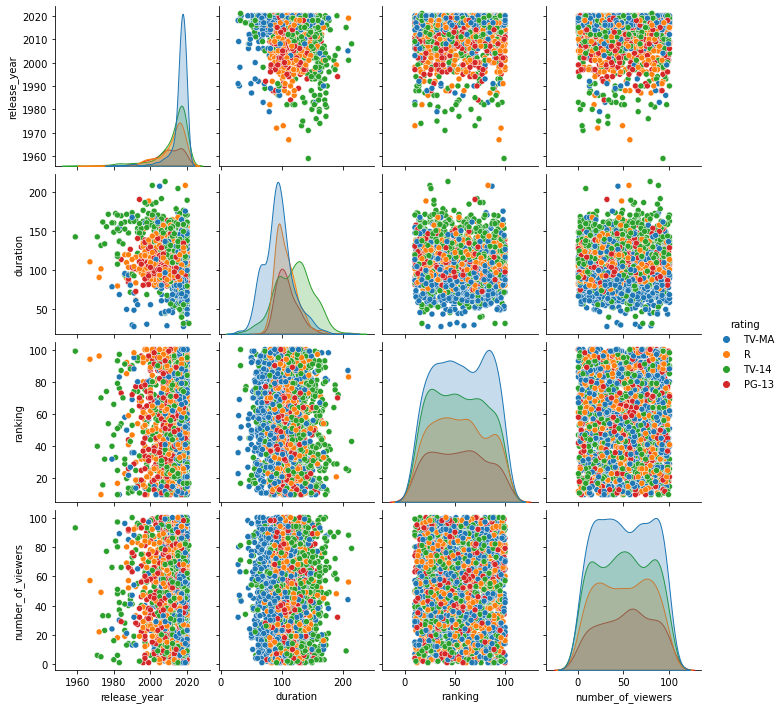

In [13]:
sns.pairplot(df1, hue='rating')

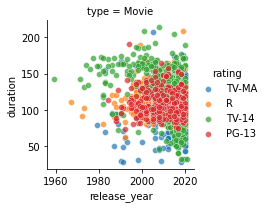

In [14]:
# sns.pairplot(df1, hue='rating', height=2)
g = sns.FacetGrid(df1, col="type", hue="rating")
g.map(sns.scatterplot, "release_year", "duration", alpha=.7)
g.add_legend()

# We can see that the 'release_year' has more influence.
Between years 1980-2000 there was more PG-13 movies and in years 2000-2020 TV-14.

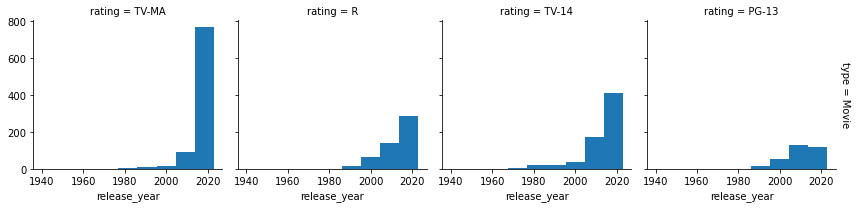

In [15]:
grid = sns.FacetGrid(df1, row="type", col="rating", margin_titles=True)
grid.map(plt.hist, "release_year", bins=np.linspace(1940, 2023, 10));

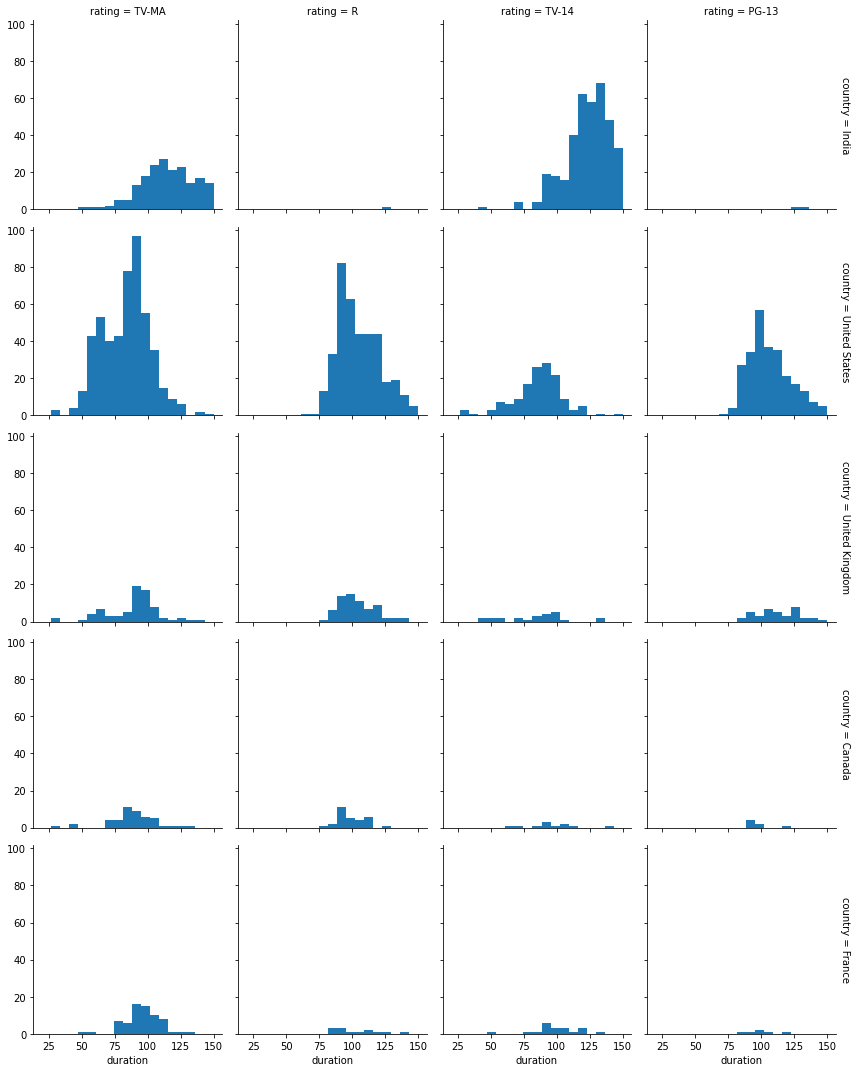

In [16]:
grid = sns.FacetGrid(df1, row="country", col="rating", margin_titles=True)
grid.map(plt.hist, "duration", bins=np.linspace(20, 150, 20));

# We can learn from this that Countries: USA and India are a big influence for the rating decision, and that if the movie is less than 150 minutes it has more influence.

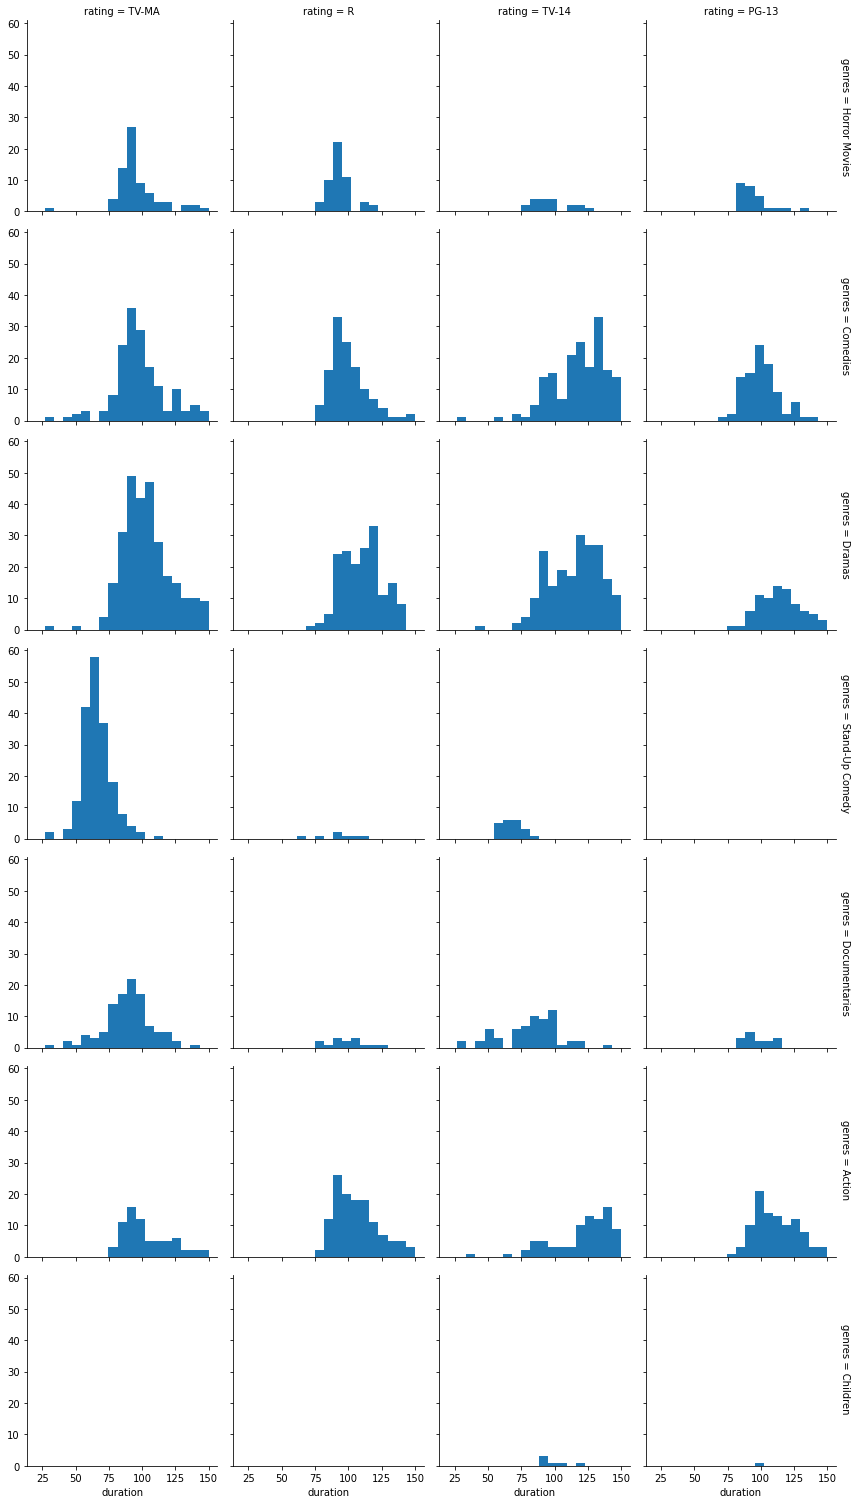

In [17]:
grid = sns.FacetGrid(df1, row="genres", col="rating", margin_titles=True)
grid.map(plt.hist, "duration", bins=np.linspace(20, 150, 20));

# We can see that Genres: "Children" classified TV-PG, "Docu"/"Stand-up"/"Dramas" are TV-MA.

In [18]:
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler

df1['rating'] = df1['rating'].replace('TV-MA', 17).replace('TV-14', 14).replace('R', 18).replace('PG-13', 13)
df1['genres'] = df1['genres'].replace('Horror Movies',1).replace('Dramas',2).replace('Comedies',3).replace('Action ',4).replace('Stand-Up Comedy',5).replace('Documentaries',6).replace('Children ',7)
X = df1.drop(['type','title','director','country','date_added','ranking','number_of_viewers'], axis=1)
y = df1['rating']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted

1.0


/var/folders/bg/49hdc2yx15zdb796ct2xvzn40000gn/T/ipykernel_46323/179121790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rating'] = df1['rating'].replace('TV-MA', 17).replace('TV-14', 14).replace('R', 18).replace('PG-13', 13)
/var/folders/bg/49hdc2yx15zdb796ct2xvzn40000gn/T/ipykernel_46323/179121790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genres'] = df1['genres'].replace('Horror Movies',1).replace('Dramas',2).replace('Comedies',3).replace('Action ',4).replace('Stand-Up Comedy',5)

,index,release_year,rating,duration,genres,index,rating,prediction
0,1506,2018,17,109,2,1506,17,17
1,2368,2017,17,63,5,2368,17,17
2,3668,2016,18,103,2,3668,18,18
3,2344,2019,14,124,2,2344,14,14
4,2292,2018,17,96,2,2292,17,17
...,...,...,...,...,...,...,...,...
590,2485,2017,14,145,4,2485,14,14
591,7090,2005,18,132,4,7090,18,18
592,7776,2015,13,92,2,7776,13,13
593,6903,2004,13,101,3,6903,13,13


In [22]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'

    # Take 2 feature columns from df for the visualization 
    col1 = df.columns[5]
    col2 = df.columns[7]

    # Take class column as color difference 
    target = df.columns[6]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_

    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

In [23]:
pd.concat([X,y],axis=1)

,release_year,rating,duration,genres,rating
1,2008,17,143,1,17
3,2016,18,90,3,18
7,2010,18,112,2,18
8,2005,14,129,3,14
13,2009,13,164,3,13
...,...,...,...,...,...
7774,2012,14,110,2,14
7776,2015,13,92,2,13
7781,2001,18,123,2,18
7785,2013,13,98,3,13


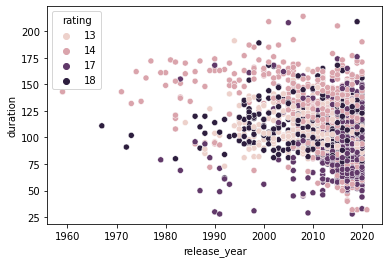

ValueError: could not convert string to float: 'Movie'

In [24]:
bayes_plot(df1,spread=1)

In [26]:
df1.to_csv('./ready_dataset_netflix.csv')